In [21]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [26]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


In [23]:
day_average['Rating'].max()

5.0

In [24]:
day_average['Rating'].min()

3.7916666666666665

### Rating average/count by day

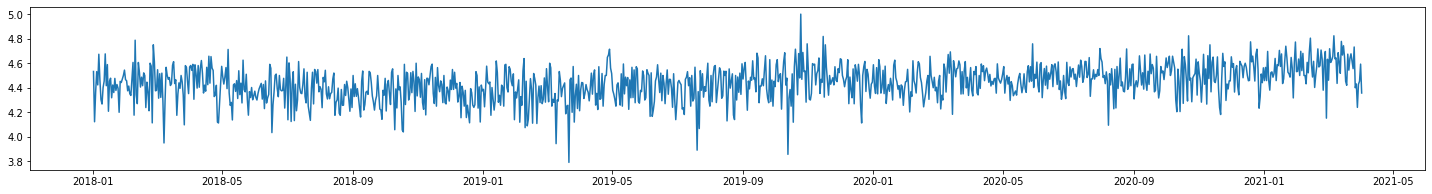

In [27]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

### Rating average by week

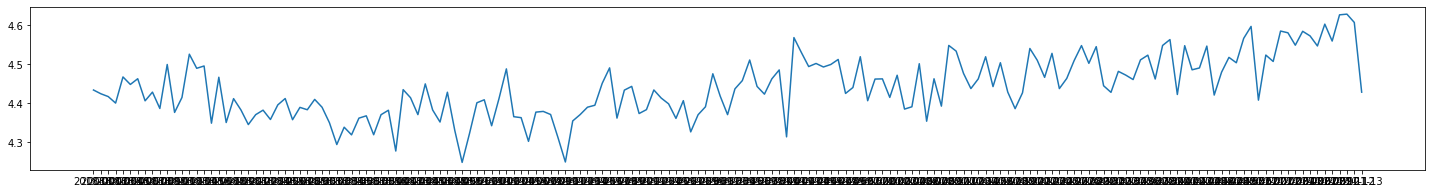

In [40]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()

plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])

### Average rating by month

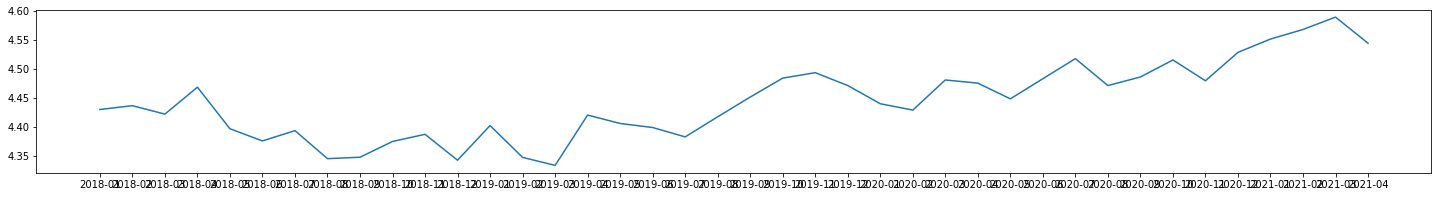

In [43]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()

plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average['Rating'])

### Average rating by month by course

<AxesSubplot:xlabel='Month'>

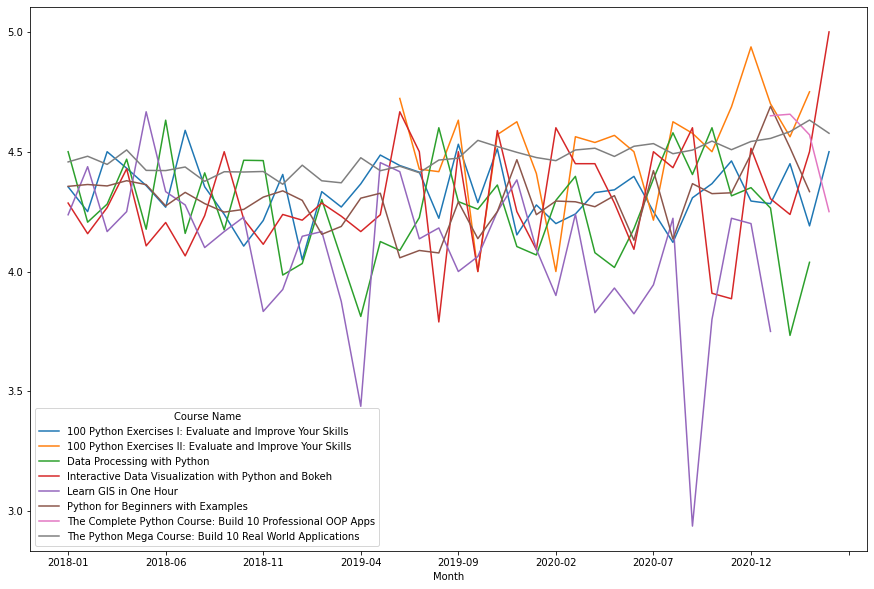

In [72]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()

month_average_crs.plot(figsize=(15,10))

In [61]:
month_average_crs

Timestamp  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                                   58.0         
2018-02                                                   36.0         
2018-03                                                   46.0         
2018-04                                                   29.0         
2018-05                                                   46.0         
2018-06                                                   41.0         
2018-07                                                   28.0         
2018-08                                                   41.0         
2018-09                                                   44.0         
2018-10                                                   33.0         
2018-11                                                   47.0         
2018-12                                                   58.0         
2019-01                                                   41.0         
2019-02                                                   39.0         
2019-03                                                   52.0         
2019-04                                                   41.0         
2019-05                                                   36.0         
2019-06                                                   26.0         
2019-07                                                   41.0         
2019-08                                                   36.0         
2019-09                                                   32.0         
2019-10                                                   40.0         
2019-11                                                   41.0         
2019-12                                                   36.0         
2020-01                                                   45.0         
2020-02                                                   35.0         
2020-03                                                   50.0         
2020-04                                                   82.0         
2020-05                                                   88.0         
2020-06                                                   68.0         
2020-07                                                   30.0         
2020-08                                                   37.0         
2020-09                                                   26.0         
2020-10                                                   30.0         
2020-11                                                   26.0         
2020-12                                                   34.0         
2021-01                                                   30.0         
2021-02                                                   20.0         
2021-03                                                   21.0         
2021-04                                                    3.0         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11      

### What day are people the happiest?

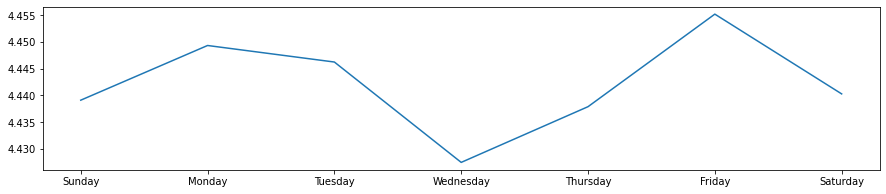

In [88]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
weekday_average

plt.figure(figsize=[15, 3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])